### Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils

### Load in Images and save to .npy file so we dont have to do this process everytime we run the notebook

In [15]:
# Read in image files and save to .npy file to be accessed faster
folder = os.listdir('./aptos2019-blindness-detection/train_images/')
images = []
for file in folder:
    filepath =  './aptos2019-blindness-detection/train_images/' + file
    image = cv2.imread(filepath)
    # read in the files and downscale to 224x224
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # store images and labels
    images.append(image)

np.save('images.npy', images)

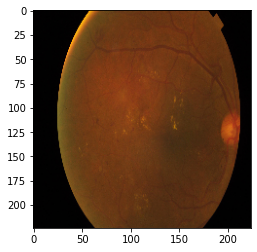

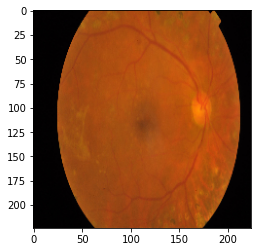

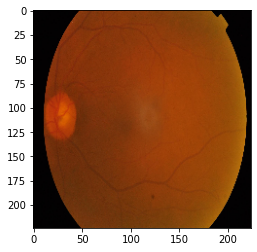

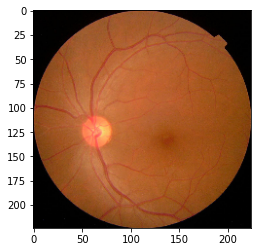

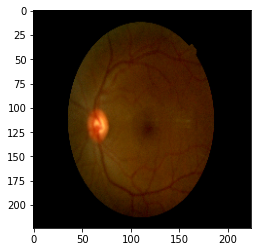

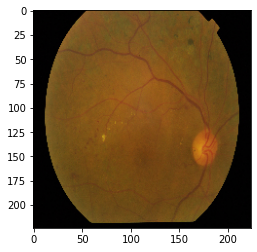

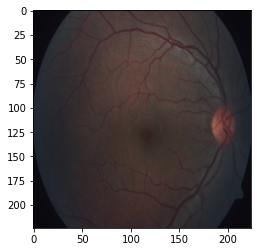

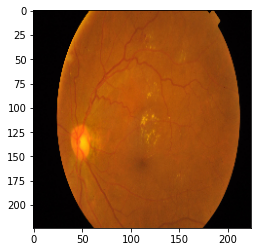

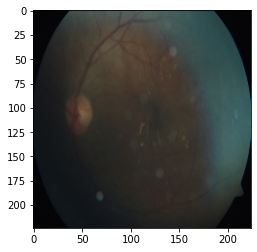

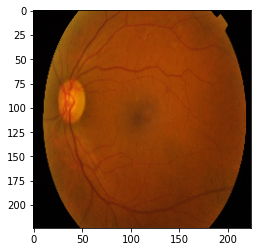

In [16]:
# view images
for i in range(10):
    plt.imshow(images[i], cmap = plt.get_cmap('gray'))
    plt.show()

### load images and train test split

In [7]:
loaded_images = np.load('./images.npy')
train = pd.read_csv('./aptos2019-blindness-detection/train.csv')

X = loaded_images
y = train['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)#stratify b/c we have unbalanced classes

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = utils.to_categorical(y_train, 5)
y_test = utils.to_categorical(y_test, 5)

### Get Baseline and check input shapes

In [18]:
y.value_counts(normalize=True)

0    0.492900
2    0.272802
1    0.101038
4    0.080557
3    0.052703
Name: diagnosis, dtype: float64

**Our baseline will be 49%**

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2746, 224, 224, 3), (2746, 5), (916, 224, 224, 3), (916, 5))

**Everything looks good to go. We are ready to model**